##### test kernelshap code

In [1]:
import importlib
from model.attribution_methods import kernelshap
import numpy as np
from model.training import train_model
from data import datasets
from data.util.utils import DatasetMode
import torch
from evaluation import kernelshap_evaluator
from model.util import visualisation

c:\Users\ellen\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
importlib.reload(kernelshap)
importlib.reload(kernelshap_evaluator)

<module 'evaluation.kernelshap_evaluator' from 'c:\\Users\\ellen\\Documents\\sose 23\\pg wissensentdeckung\\code\\repo\\Project_Group_Attribution_Method\\evaluation\\kernelshap_evaluator.py'>

In [3]:
model, train_loss, train_acc, test_loss, test_acc = train_model([8], num_epochs=10)

100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


In [4]:
dataset = datasets.DryBean(mode=DatasetMode.TRAIN)

x,y = dataset[20]
print(x)
y_index = np.argmax(y.numpy())
print(model.predict(x))
kernel = kernelshap.Kernelshap(model, dataset, n=16)
res = kernel.attribute(x=x, target_label_index=y_index, sample_percentage=0.005, number_of_samples=60, log_odds=False)
print(res)
print(res[0].argsort(descending=True))
print(sum(res[0]))

tensor([0.1033, 0.2292, 0.2634, 0.1559, 0.6106, 0.9075, 0.1021, 0.1889, 0.9970,
        0.7434, 0.4657, 0.2363, 0.6016, 0.2182, 0.1978, 0.6633])
tensor([1.9331e-05, 2.5741e-11, 1.3910e-03, 2.2324e-04, 9.5323e-01, 4.4874e-08,
        4.5136e-02])


c:\Users\ellen\Documents\sose 23\pg wissensentdeckung\code\repo\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


(tensor([ 0.1307,  0.0495,  0.0387,  0.0222,  0.0546,  0.0772,  0.0249, -0.0302,
         0.0279,  0.0022, -0.0075,  0.0187,  0.1741,  0.0734,  0.0715,  0.1479,
         0.0766], dtype=torch.float64), 4)
tensor([12, 15,  0,  5, 16, 13, 14,  4,  1,  2,  8,  6,  3, 11,  9, 10,  7])
tensor(0.9526, dtype=torch.float64)


In [5]:
dataset2 = datasets.DryBean(mode=DatasetMode.TEST)

In [6]:
evaluator = kernelshap_evaluator.KernelshapEvaluator(model, dataset2, kernel)

In [ ]:
evaluator.test_efficiency()

In [ ]:
evaluator.test_efficiency()

In [ ]:

evaluator.evaluate_sample_size(10, 160, 10)

In [ ]:
evaluator.evaluate_sample_size(10, 160, 10)

In [ ]:
evaluator.evaluate_sample_size(10, 160, 10)

In [ ]:
evaluator.evaluate_sample_size(10, 160, 10)

In [ ]:
evaluator.evaluate_sample_size(5, 30, 5)

In [ ]:
print(model.predict(x))
evaluator.evaluate_subset_percentage(0.001, 0.026, 0.002)

[1156]


c:\Users\ellen\Documents\sose 23\pg wissensentdeckung\code\repo\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


[None, 0.24299326808114552, 0.07850420424749792, 0.04760730156257385, 0.03925071806787173, 0.030356345783679795, 0.025205518708647665, 0.022215158950569157, 0.016214227809061024, 0.01820896496274567, 0.01786749906178075, 0.018284753510367728, 0.009603509374299388]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


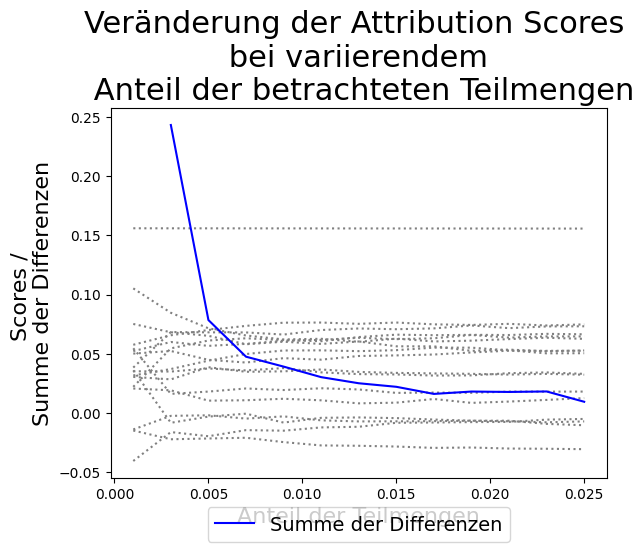

In [7]:
evaluator.evaluate_subset_percentage(0.001, 0.026, 0.002)

In [ ]:
np.random.seed(43)
indices_samples = np.random.randint(len(dataset), size=60)
print(indices_samples)
results = np.zeros(7)
for i in indices_samples:
    x,y = dataset[i]
    results = np.add(results, model.predict(x))
div_res = results/len(indices_samples)
print(div_res)

x2, y2 = dataset2[2]
print(model.predict(x2))


In [ ]:
from model.training import train_autobaseline

# autobaseline = train_autobaseline(model)
# kwargs = {'baseline': autobaseline}

evaluator.test_efficiency(3)

In [ ]:
from model.util.baseline_generator import generate_uniform_baseline, generate_balanced_uniform_baseline

print(model.predict(generate_uniform_baseline(n=1000)))
# print(network.predict(generate_balanced_uniform_baseline(n=300)))

testi = torch.zeros(16)
testi[12] = 0.2

print(model.predict(testi))


In [ ]:
evaluator.evaluate_both()

In [ ]:
random_indices = np.random.randint(len(dataset2), size=20)
for i in random_indices:
    x,y = dataset2[i]
    print(i)
    print(model.predict(x))